In [1]:
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

from sklearn import metrics

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns

import time

In [2]:
def plot_learner(train_sizes, train_scores, test_scores, label_train,label_test, title, xlabel, ylabel, filename):
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label=label_train)
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label=label_test)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc="best")
    plt.grid()
    plt.savefig(filename)
    plt.show()
    plt.clf()

In [3]:
def plot_log_learner(train_sizes, train_scores, test_scores, label_train,label_test, title, xlabel, ylabel, filename):
    plt.semilogx(train_sizes, np.mean(train_scores, axis=1), label=label_train)
    plt.semilogx(train_sizes, np.mean(test_scores, axis=1), label=label_test)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc="best")
    plt.grid()
    plt.savefig(filename)
    plt.show()
    plt.clf()

In [4]:
def import_data():
    df_ds1 = pd.read_csv("winequality-red.csv", sep=";") # .append(pd.read_csv("winequality-white.csv", sep=";"))
    missing_values = ['?']
    df_ds2 = pd.read_csv("breast-cancer-wisconsin.csv", sep=",",na_values = missing_values)
    df_ds2.fillna(method='ffill',inplace=True)
    X_ds1 = np.array(df_ds1.values[:,1:-1])
    y_ds1 = np.array(df_ds1.values[:,-1])
    y_ds1 = (y_ds1<7).astype(int)
    X_ds2 = np.array(df_ds2.values[:,1:-1])
    y_ds2 = np.array(df_ds2.values[:,-1])
    return X_ds1, y_ds1, X_ds2, y_ds2

In [5]:
def train_test(X, y):
    X_train, X_test, y_train, y_test = train_test_split(np.array(X),np.array(y), test_size=0.25)
    sc = preprocessing.StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    return X_train, X_test, y_train, y_test

In [6]:
def svm_learner(X_train, X_test, y_train, y_test):
    __clf_svm = svm.SVC(random_state=18,kernel='rbf')
    print(__clf_svm)
    t0 = time.time()
    __clf_svm.fit(X_train, y_train)
    t1 = time.time() - t0
    print('Training time: ',t1)
    y_pred = __clf_svm.predict(X_test)
    _accuracy = metrics.accuracy_score(y_test, y_pred)
    print('Accuracy : ', _accuracy*100)
    return  __clf_svm

In [7]:
def plot_svm_validation_curve(svm_linear,X_train, y_train,filename):
    C_range = [0.01,0.1,1,10]
    train_scores, test_scores = validation_curve(svm_linear, X_train, y_train, param_name="C", param_range=C_range, cv=5)
    plot_log_learner(C_range,train_scores, test_scores,'Training score', 'Cross-validation score','Validation curve for SVM', 'C Values',  'Score', filename)


In [8]:
def set_svm_hyperparameters(svm_linear, X_train, y_train,X_test):
    C_range = [0.01,0.1,1,10]
    _params = [{'C' : C_range}]
    svm_linear = GridSearchCV(svm_linear, param_grid=_params, cv=5)
    svm_linear.fit(X_train, y_train)
    clf_svm_ = svm_linear
    print('Best Paremeters: ', svm_linear.best_params_)
    y_pred = clf_svm_.predict(X_test)
    print('Accuracy: ' , (metrics.accuracy_score(y_test, y_pred) * 100))
    return clf_svm_.best_params_

In [9]:
def plot_svm_learning_curve(clf_svm_best_params_, X_train, y_train,filename):
    __C = clf_svm_best_params_['C']
    __clf_lc_svm = svm.SVC(random_state=18,C=0.88,kernel='rbf')
    print(__clf_lc_svm)
    __clf_lc_svm.fit(X_train, y_train)
    train_sizes = np.linspace(.3, 1.0, 6)
    train_sizes, train_scores, test_scores = learning_curve(__clf_lc_svm, X_train, y_train, train_sizes=train_sizes, cv=5,random_state=18)

    plot_learner(train_sizes,train_scores, test_scores,'Training score', 'Cross-validation score','Learning curve for SVM', 'Training Examples',  'Score', filename)


In [10]:
X_ds1, y_ds1, X_ds2, y_ds2 = import_data()

In [11]:
X_train, X_test, y_train, y_test = train_test(X_ds1, y_ds1)

In [12]:
clf_svm_1 = svm_learner(X_train, X_test, y_train, y_test)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=18,
    shrinking=True, tol=0.001, verbose=False)
Training time:  0.04595637321472168
Accuracy :  89.25


C:\Dev\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Dev\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Dev\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Dev\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma w

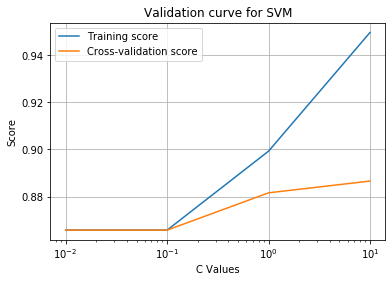

<Figure size 432x288 with 0 Axes>

In [13]:
plot_svm_validation_curve(clf_svm_1,X_train, y_train,'svm_validation_curve_1-100.png')

In [14]:
clf_svm_best_param_1 = set_svm_hyperparameters(clf_svm_1, X_train, y_train,X_test)

C:\Dev\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Dev\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Dev\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Dev\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma w

Best Paremeters:  {'C': 10}
Accuracy:  89.0


SVC(C=0.88, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=18,
    shrinking=True, tol=0.001, verbose=False)


C:\Dev\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Dev\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Dev\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Dev\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma w

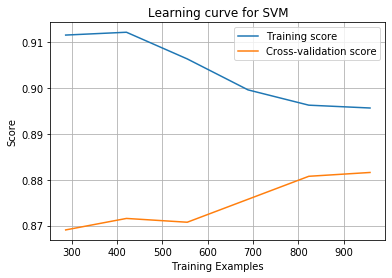

<Figure size 432x288 with 0 Axes>

In [15]:
plot_svm_learning_curve(clf_svm_best_param_1, X_train, y_train,'svm_learning_curve_1-100.png')

In [16]:
X_train, X_test, y_train, y_test = train_test(X_ds2, y_ds2)

In [17]:
clf_svm_2 = svm_learner(X_train, X_test, y_train, y_test)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=18,
    shrinking=True, tol=0.001, verbose=False)
Training time:  0.00499415397644043
Accuracy :  98.28571428571429


C:\Dev\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Dev\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Dev\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Dev\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma w

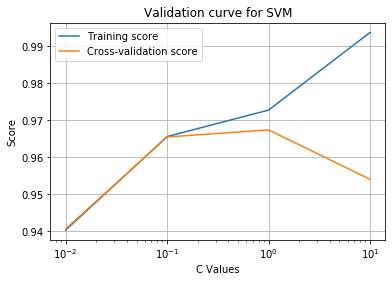

<Figure size 432x288 with 0 Axes>

In [18]:
plot_svm_validation_curve(clf_svm_2,X_train, y_train,'svm_validation_curve_2-100.png')

In [19]:
clf_svm_best_param_2 = set_svm_hyperparameters(clf_svm_2, X_train, y_train,X_test)

Best Paremeters:  {'C': 1}
Accuracy:  98.28571428571429


C:\Dev\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Dev\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Dev\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Dev\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma w

C:\Dev\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=0.88, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=18,
    shrinking=True, tol=0.001, verbose=False)


C:\Dev\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Dev\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Dev\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Dev\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma w

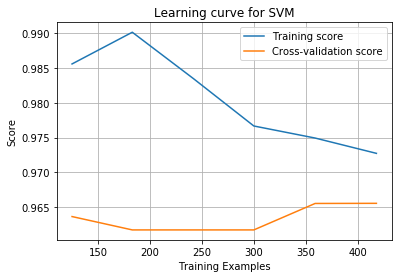

<Figure size 432x288 with 0 Axes>

In [20]:
plot_svm_learning_curve(clf_svm_best_param_2, X_train, y_train,'svm_learning_curve_2-100.png')